# Pymaceuticals Inc.
---

### Analysis

- The final results after analyzing data from a pharmaceutical company’s animal study on skin cancer treatments, the conclusion is that Capomulin is the most effective treatment. When analyzining the distribution of tumpr for each treatment group, capomulin was the most effective beacuse it had the lowest distribution of the tumor volume. When it came to the line graph, we took an example of a mouse (j119) treated with Capomulin and thereare sharp decreases in tumor volume after each time point check. We also created scaterplotts to check the relationship between the mice who were treated with Capomulin. We analyzed the mouse weight and the average tumor volume. There seemed to be a correlation between the weight and tumor volume. When we tested the correlation with a regression line, we got a .84 correlation coefficient. This means that there may be some correlation. 

.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_complete = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

pymaceuticals_complete = pymaceuticals_complete[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]

# Display the data table for preview
pymaceuticals_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
count_mice = pymaceuticals_complete['Mouse ID'].nunique()
count_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = pymaceuticals_complete.loc[pymaceuticals_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pymaceuticals_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].nunique()
clean_mice

249

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats = clean_data.groupby("Drug Regimen")
mean_tumor_volume = drug_regimen_stats["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen_stats["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_regimen_stats["Tumor Volume (mm3)"].var()
std_tumor_volume = drug_regimen_stats["Tumor Volume (mm3)"].std()
sem_tumor_volume = drug_regimen_stats["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err": sem_tumor_volume
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggsummary_stats = clean_data.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)
aggsummary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

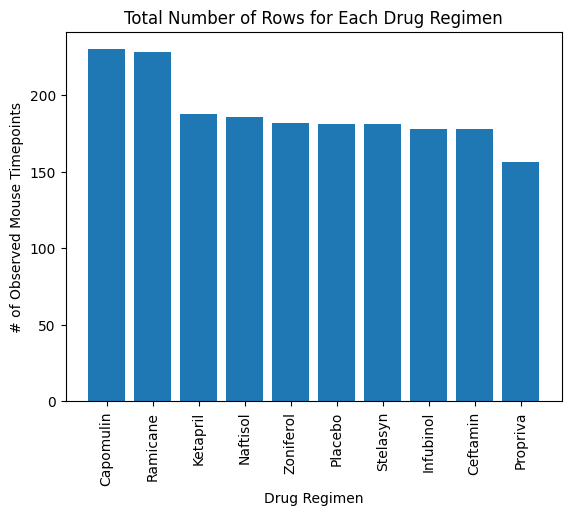

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()

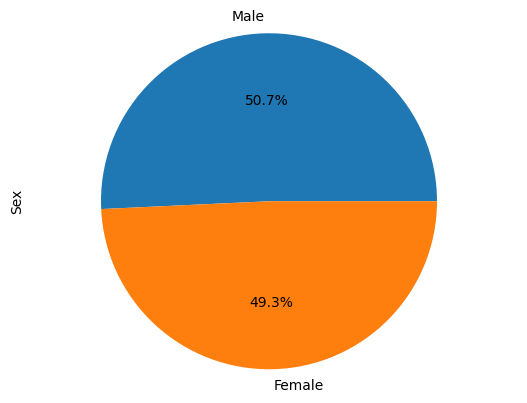

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data["Sex"].value_counts()
plt.pie(sex, autopct='%1.1f%%', labels=sex_counts.index, startangle=0)

plt.text(-1.5, 0, "Sex", ha='center', va='center', rotation='vertical')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_data = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
   # Determine outliers using upper and lower bounds
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []

for treatment in treatments:
    tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    

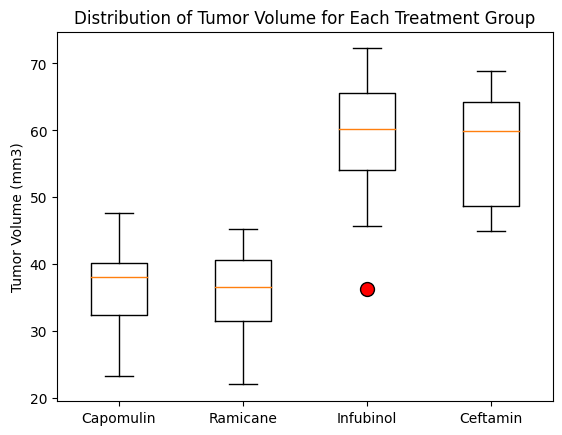

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments,flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

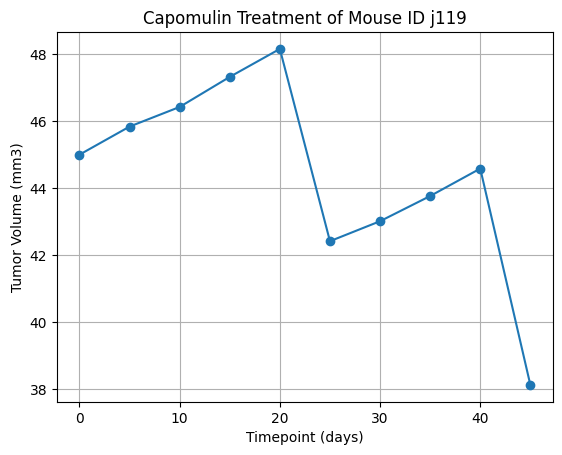

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_data = clean_data.loc[(clean_data["Mouse ID"] == "j119") & (clean_data["Drug Regimen"] == "Capomulin")]

plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse ID j119")
plt.grid(True)
plt.show()


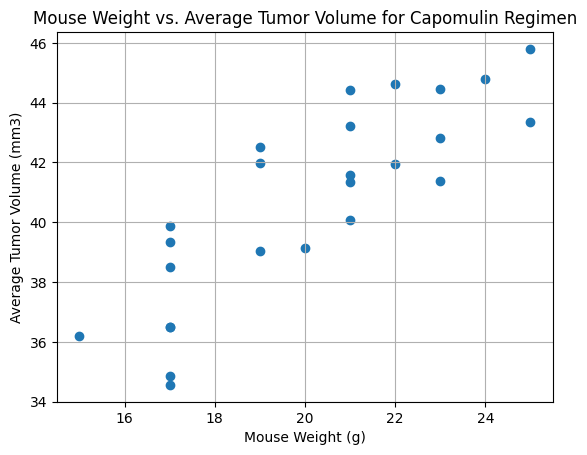

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.84


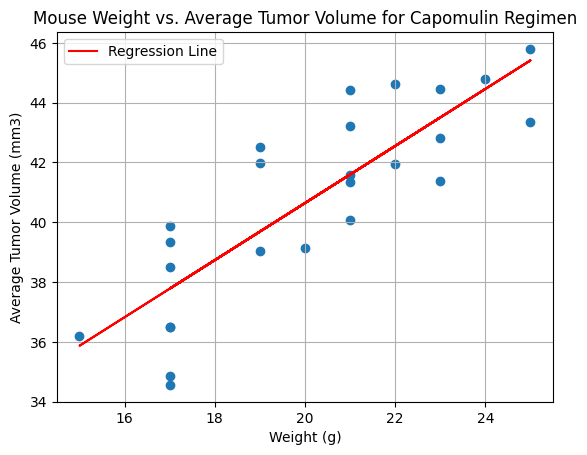

In [103]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)
print("Correlation Coefficient between Mouse Weight and Average Tumor Volume:", round(correlation_coefficient,2))

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.legend()
plt.grid(True)
plt.show()